# <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Pandas (2)</p>

<div class="alert alert-block alert-info alert">

# <span style=" color:red">Conditional Filtering and Useful Methods in Pandas

## Table of Contents
**Conditional Filtering**
* Filtering based on the single condition
* Filtering based on multiple conditions
  
**Useful Methods**
* apply
* describe
* sort_values
* corr
* idxmin and idxmax
* value_counts
* unique and nunique
* replace
* map
* duplicated and drop_duplicates
* between
* sample
* nlargest and nsmallest


## Conditional Filtering
* Since datasets are large enough in data analysis, we may need to filter based on a condition instead of position.
* Conditional Filtering allows us to select rows based on a condition on a column.

#### Which countries have Population (Pop) greater than 50? 

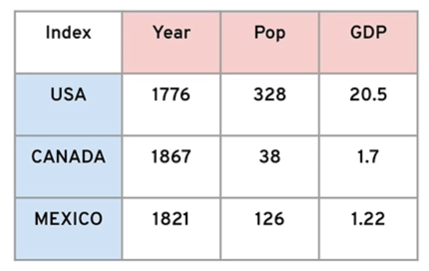

#### This gives a Series of Boolean values
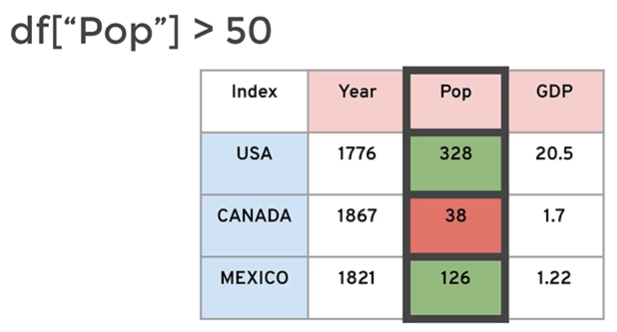

#### This code gives the selected rows based on the conditional filtering
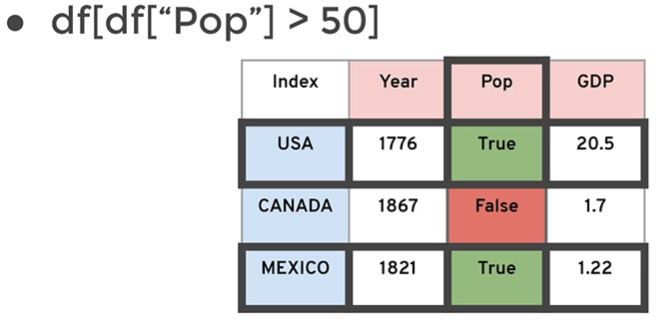

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Import the data
df = pd.read_csv("tips.csv")

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251


#### Filtering based on the single condition

##### Q1: Total Bill greater than 40 Dolars

In [4]:
df["total_bill"] > 40  # it shows boolean Series

0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Name: total_bill, Length: 244, dtype: bool

In [5]:
# To see this condition filtering as a DataFrame
df[df["total_bill"] > 40] 

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
59,48.27,6.73,Male,No,Sat,Dinner,4,12.07,Brian Ortiz,6596453823950595,Sat8139
95,40.17,4.73,Male,Yes,Fri,Dinner,4,10.04,Aaron Bentley,180026611638690,Fri9628
102,44.30,2.50,Female,Yes,Sat,Dinner,3,14.77,Heather Cohen,379771118886604,Sat6240
142,41.19,5.00,Male,No,Thur,Lunch,5,8.24,Eric Andrews,4356531761046453,Thur3621
156,48.17,5.00,Male,No,Sun,Dinner,6,8.03,Ryan Gonzales,3523151482063321,Sun7518
170,50.81,10.00,Male,Yes,Sat,Dinner,3,16.94,Gregory Clark,5473850968388236,Sat1954
182,45.35,3.50,Male,Yes,Sun,Dinner,3,15.12,Jose Parsons,4112207559459910,Sun2337
184,40.55,3.00,Male,Yes,Sun,Dinner,2,20.27,Stephen Cox,3547798222044029,Sun5140
197,43.11,5.00,Female,Yes,Thur,Lunch,4,10.78,Brooke Soto,5544902205760175,Thur9313
212,48.33,9.00,Male,No,Sat,Dinner,4,12.08,Alex Williamson,676218815212,Sat4590


In [6]:
# A long but clear way to write this code
boolean_series = df["total_bill"] > 40
df[boolean_series]

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
59,48.27,6.73,Male,No,Sat,Dinner,4,12.07,Brian Ortiz,6596453823950595,Sat8139
95,40.17,4.73,Male,Yes,Fri,Dinner,4,10.04,Aaron Bentley,180026611638690,Fri9628
102,44.30,2.50,Female,Yes,Sat,Dinner,3,14.77,Heather Cohen,379771118886604,Sat6240
142,41.19,5.00,Male,No,Thur,Lunch,5,8.24,Eric Andrews,4356531761046453,Thur3621
156,48.17,5.00,Male,No,Sun,Dinner,6,8.03,Ryan Gonzales,3523151482063321,Sun7518
170,50.81,10.00,Male,Yes,Sat,Dinner,3,16.94,Gregory Clark,5473850968388236,Sat1954
182,45.35,3.50,Male,Yes,Sun,Dinner,3,15.12,Jose Parsons,4112207559459910,Sun2337
184,40.55,3.00,Male,Yes,Sun,Dinner,2,20.27,Stephen Cox,3547798222044029,Sun5140
197,43.11,5.00,Female,Yes,Thur,Lunch,4,10.78,Brooke Soto,5544902205760175,Thur9313
212,48.33,9.00,Male,No,Sat,Dinner,4,12.08,Alex Williamson,676218815212,Sat4590


##### Q2: Only Males

In [7]:
df[df["sex"]=="Male"]

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
5,25.29,4.71,Male,No,Sun,Dinner,4,6.32,Erik Smith,213140353657882,Sun9679
6,8.77,2.00,Male,No,Sun,Dinner,2,4.38,Kristopher Johnson,2223727524230344,Sun5985
...,...,...,...,...,...,...,...,...,...,...,...
236,12.60,1.00,Male,Yes,Sat,Dinner,2,6.30,Matthew Myers,3543676378973965,Sat5032
237,32.83,1.17,Male,Yes,Sat,Dinner,2,16.42,Thomas Brown,4284722681265508,Sat2929
239,29.03,5.92,Male,No,Sat,Dinner,3,9.68,Michael Avila,5296068606052842,Sat2657
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.34,Keith Wong,6011891618747196,Sat3880


##### Q3: Size equals and greater than 5

In [8]:
df[df["size"] >= 5]

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
125,29.80,4.20,Female,No,Thur,Lunch,6,4.97,Angela Sanchez,503857080488,Thur3948
141,34.30,6.70,Male,No,Thur,Lunch,6,5.72,Steven Carlson,3526515703718508,Thur1025
142,41.19,5.00,Male,No,Thur,Lunch,5,8.24,Eric Andrews,4356531761046453,Thur3621
143,27.05,5.00,Female,No,Thur,Lunch,6,4.51,Regina Jones,4311048695487,Thur6179
155,29.85,5.14,Female,No,Sun,Dinner,5,5.97,Madison Wilson,4210875236164664,Sun9176
156,48.17,5.00,Male,No,Sun,Dinner,6,8.03,Ryan Gonzales,3523151482063321,Sun7518
185,20.69,5.00,Male,No,Sun,Dinner,5,4.14,Joseph Howell,30362407455623,Sun5842
187,30.46,2.00,Male,Yes,Sun,Dinner,5,6.09,David Barrett,4792882899700988,Sun9987
216,28.15,3.00,Male,Yes,Sat,Dinner,5,5.63,Shawn Barnett PhD,4590982568244,Sat7320


#### Filtering based on multiple conditions
* AND "&": Both conditions must be true
* OR " | ": Either condition must be true

##### Q4: Total Bill is greater than 40 for only Males

In [9]:
# First Condition
# df["total_bill"] > 40

# Second Condition
# df["sex"] == Male

In [10]:
# Separate conditions with paranthesis and write them inside df[] with "&" Operator
df[(df["total_bill"] > 40) & (df["sex"] == "Male")]

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
59,48.27,6.73,Male,No,Sat,Dinner,4,12.07,Brian Ortiz,6596453823950595,Sat8139
95,40.17,4.73,Male,Yes,Fri,Dinner,4,10.04,Aaron Bentley,180026611638690,Fri9628
142,41.19,5.00,Male,No,Thur,Lunch,5,8.24,Eric Andrews,4356531761046453,Thur3621
156,48.17,5.00,Male,No,Sun,Dinner,6,8.03,Ryan Gonzales,3523151482063321,Sun7518
170,50.81,10.00,Male,Yes,Sat,Dinner,3,16.94,Gregory Clark,5473850968388236,Sat1954
182,45.35,3.50,Male,Yes,Sun,Dinner,3,15.12,Jose Parsons,4112207559459910,Sun2337
184,40.55,3.00,Male,Yes,Sun,Dinner,2,20.27,Stephen Cox,3547798222044029,Sun5140
212,48.33,9.00,Male,No,Sat,Dinner,4,12.08,Alex Williamson,676218815212,Sat4590


##### Q5: Values for only Weekend (Saturdays and Sundays)

In [11]:
# Since we need two days, we will use OR "|" operator
df[(df["day"] =="Sat") | (df["day"] =="Sun")]

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251
...,...,...,...,...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3,11.94,Kimberly Crane,676184013727,Sat9777
239,29.03,5.92,Male,No,Sat,Dinner,3,9.68,Michael Avila,5296068606052842,Sat2657
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.59,Monica Sanders,3506806155565404,Sat1766
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.34,Keith Wong,6011891618747196,Sat3880


In [12]:
# Another way is to use "isin()" method
# This method is especially useful if there are more than two conditions

options = ["Sat", "Sun"]
df[df["day"].isin(options)]     # or df[df["day"].isin(["Sat", "Sun"])] 

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251
...,...,...,...,...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3,11.94,Kimberly Crane,676184013727,Sat9777
239,29.03,5.92,Male,No,Sat,Dinner,3,9.68,Michael Avila,5296068606052842,Sat2657
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.59,Monica Sanders,3506806155565404,Sat1766
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.34,Keith Wong,6011891618747196,Sat3880


## Useful Methods
* [apply() method](#apply_method)
  
  [apply() with a function](#apply_function)
  
  [apply() with a lambda expression](#apply_lambda)
  
  [apply() on multiple columns](#apply_multiple)
  
* [describe()](#describe)
* [sort_values()](#sort)
* [corr()](#corr)
* [idxmin and idxmax](#idx)
* [value_counts](#v_c)
* [unique and nunique](#uni)
* [replace](#replace)
* [map](#map)
* [duplicated and drop_duplicates](#dup)
* [between](#bet)
* [sample](#sample)
* [nlargest](#n)

<a id='apply_method'></a>

### apply() 

<a id='apply_function'></a>
#### apply with a function

##### We want to grab the last 4 digits of "CC Number". How can we do that? 

Since data type of this column is integer (check info), we need to convert it into string to grab items.

In [13]:
# Let's write a function to grab all 4 digits through rows.

def last_four(num):
    return str(num)[-4:] # the last 4 digits of th number but as a string

In [14]:
# let's check our function

last_four(19375492847)

'2847'

In [15]:
# Let's apply our funtion to "CC Number" column and create a new column in our data frame

df["last_four"]= df["CC Number"].apply(last_four)  # without assigning it, it is just Series

In [16]:
df.head() # see the new column

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,1322
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,5994
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,7221


##### Now, we want to categorize "total_bill" prices as 3 different groups and show it with dolar signs.

In [17]:
# Let's create a function

def category(price):
    if price < 10:
        return "$"
    elif price >= 10 and price < 30:
        return "$$"
    else:
        return "$$$"

In [18]:
# Now, we can create our new column using apply method

df["category"] = df["total_bill"].apply(category)

In [19]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,category
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230,$$
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,1322,$$
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,5994,$$
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,7221,$$


<a id='apply_lambda'></a>
#### apply with a lambda experssion

In [20]:
# Let's remember how to use lampda experssion inplace of a function

# Let's write a funtion that multiplies a number by 2
def simple(num):
    return num*2

In [21]:
simple(4)

8

In [22]:
# Let's try this funtion for total_bill and multiply all values by 2

df["total_bill"].apply(simple)

0      33.98
1      20.68
2      42.02
3      47.36
4      49.18
       ...  
239    58.06
240    54.36
241    45.34
242    35.64
243    37.56
Name: total_bill, Length: 244, dtype: float64

In [23]:
# Now, let's write it with lambda (lambda num: num*2)

df["total_bill"].apply(lambda num: num*2)

0      33.98
1      20.68
2      42.02
3      47.36
4      49.18
       ...  
239    58.06
240    54.36
241    45.34
242    35.64
243    37.56
Name: total_bill, Length: 244, dtype: float64

<a id='apply_multiple'></a>
#### apply method on multiple columns

##### Take "total_bill" and "tip" columns and label tips generous or not based on the "total_bill"

In [24]:
# Our function will take two arguments

def quality(total_bill, tip):
    if tip/total_bill > 0.25:
        return "Generous"
    else:
        return "Other"

In [25]:
# Let's check this function for these columns in the first row
quality(16.99, 1.01)

'Other'

In [26]:
# Let's use this function with lambda expression

df[["total_bill", "tip"]].apply(lambda df: quality(df["total_bill"], df["tip"]), axis=1)

# Select the columns, call apply method and apply it with lambda to these columns using "quality" function above

0      Other
1      Other
2      Other
3      Other
4      Other
       ...  
239    Other
240    Other
241    Other
242    Other
243    Other
Length: 244, dtype: object

In [27]:
# If we want to add it as a new column, we need to assign it as a new column
df["Quality"] = df[["total_bill", "tip"]].apply(lambda df: quality(df["total_bill"], df["tip"]), axis=1)

In [28]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,category,Quality
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$,Other
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230,$$,Other
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,1322,$$,Other
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,5994,$$,Other
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,7221,$$,Other


#### np.vectorize

In [29]:
# Another way to do it is "np.vectorize"

df["Quality"] = np.vectorize(quality)(df["total_bill"], df["tip"]) # we do not need to specify axis

In [30]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,category,Quality
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$,Other
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230,$$,Other
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,1322,$$,Other
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,5994,$$,Other
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,7221,$$,Other


This method is faster and more efficient than lambda. We can compare its performance with lambda using "timeit".

<a id='describe'></a>
#### describe()
Use describe method to see the statistical summary of the data frame (numeric features).

In [31]:
df.describe()

,total_bill,tip,size,price_per_person,CC Number
count,244.000000,244.000000,244.000000,244.000000,2.440000e+02
mean,19.785943,2.998279,2.569672,7.888197,2.563496e+15
std,8.902412,1.383638,0.951100,2.914234,2.369340e+15
min,3.070000,1.000000,1.000000,2.880000,6.040679e+10
25%,13.347500,2.000000,2.000000,5.800000,3.040731e+13
50%,17.795000,2.900000,2.000000,7.255000,3.525318e+15
75%,24.127500,3.562500,3.000000,9.390000,4.553675e+15
max,50.810000,10.000000,6.000000,20.270000,6.596454e+15


In [32]:
df.describe().transpose()        # or df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,1.978594e+01,8.902412e+00,3.070000e+00,1.334750e+01,1.779500e+01,2.412750e+01,5.081000e+01
tip,244.0,2.998279e+00,1.383638e+00,1.000000e+00,2.000000e+00,2.900000e+00,3.562500e+00,1.000000e+01
size,244.0,2.569672e+00,9.510998e-01,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
price_per_person,244.0,7.888197e+00,2.914234e+00,2.880000e+00,5.800000e+00,7.255000e+00,9.390000e+00,2.027000e+01
CC Number,244.0,2.563496e+15,2.369340e+15,6.040679e+10,3.040731e+13,3.525318e+15,4.553675e+15,6.596454e+15


<a id='sort'></a>
#### sort_values()

In [33]:
# Let's sort the data frame according to one column, for example, "tip"
df.sort_values("tip")       # from the lowest to the highest; by default "ascending=True"

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,category,Quality
67,3.07,1.00,Female,Yes,Sat,Dinner,1,3.07,Tiffany Brock,4359488526995267,Sat3455,5267,$,Generous
236,12.60,1.00,Male,Yes,Sat,Dinner,2,6.30,Matthew Myers,3543676378973965,Sat5032,3965,$$,Other
92,5.75,1.00,Female,Yes,Fri,Dinner,2,2.88,Leah Ramirez,3508911676966392,Fri3780,6392,$,Other
111,7.25,1.00,Female,No,Sat,Dinner,1,7.25,Terri Jones,3559221007826887,Sat4801,6887,$,Other
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,34.30,6.70,Male,No,Thur,Lunch,6,5.72,Steven Carlson,3526515703718508,Thur1025,8508,$$$,Other
59,48.27,6.73,Male,No,Sat,Dinner,4,12.07,Brian Ortiz,6596453823950595,Sat8139,0595,$$$,Other
23,39.42,7.58,Male,No,Sat,Dinner,4,9.86,Lance Peterson,3542584061609808,Sat239,9808,$$$,Other
212,48.33,9.00,Male,No,Sat,Dinner,4,12.08,Alex Williamson,676218815212,Sat4590,5212,$$$,Other


In [34]:
# Sort it from higest to lowest

df.sort_values("tip", ascending=False) 

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,category,Quality
170,50.81,10.00,Male,Yes,Sat,Dinner,3,16.94,Gregory Clark,5473850968388236,Sat1954,8236,$$$,Other
212,48.33,9.00,Male,No,Sat,Dinner,4,12.08,Alex Williamson,676218815212,Sat4590,5212,$$$,Other
23,39.42,7.58,Male,No,Sat,Dinner,4,9.86,Lance Peterson,3542584061609808,Sat239,9808,$$$,Other
59,48.27,6.73,Male,No,Sat,Dinner,4,12.07,Brian Ortiz,6596453823950595,Sat8139,0595,$$$,Other
141,34.30,6.70,Male,No,Thur,Lunch,6,5.72,Steven Carlson,3526515703718508,Thur1025,8508,$$$,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$,Other
236,12.60,1.00,Male,Yes,Sat,Dinner,2,6.30,Matthew Myers,3543676378973965,Sat5032,3965,$$,Other
111,7.25,1.00,Female,No,Sat,Dinner,1,7.25,Terri Jones,3559221007826887,Sat4801,6887,$,Other
67,3.07,1.00,Female,Yes,Sat,Dinner,1,3.07,Tiffany Brock,4359488526995267,Sat3455,5267,$,Generous


##### Sort Multiple Columns

In [35]:
# First according to tip, then size
df.sort_values(["tip", "size"])

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,category,Quality
67,3.07,1.00,Female,Yes,Sat,Dinner,1,3.07,Tiffany Brock,4359488526995267,Sat3455,5267,$,Generous
111,7.25,1.00,Female,No,Sat,Dinner,1,7.25,Terri Jones,3559221007826887,Sat4801,6887,$,Other
92,5.75,1.00,Female,Yes,Fri,Dinner,2,2.88,Leah Ramirez,3508911676966392,Fri3780,6392,$,Other
236,12.60,1.00,Male,Yes,Sat,Dinner,2,6.30,Matthew Myers,3543676378973965,Sat5032,3965,$$,Other
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,34.30,6.70,Male,No,Thur,Lunch,6,5.72,Steven Carlson,3526515703718508,Thur1025,8508,$$$,Other
59,48.27,6.73,Male,No,Sat,Dinner,4,12.07,Brian Ortiz,6596453823950595,Sat8139,0595,$$$,Other
23,39.42,7.58,Male,No,Sat,Dinner,4,9.86,Lance Peterson,3542584061609808,Sat239,9808,$$$,Other
212,48.33,9.00,Male,No,Sat,Dinner,4,12.08,Alex Williamson,676218815212,Sat4590,5212,$$$,Other


<a id='corr'></a>
#### corr()
Use "corr()" to see how correlated features with each other are

In [36]:
# df.corr()

In [37]:
# For two featuures
df[['total_bill','tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


<a id='idx'></a>
#### idxmin() and idxmax(): index location of min and max values

In [38]:
# Let's find min values of total_bill first, then its location
df["total_bill"].min()

3.07

In [39]:
# its location
df["total_bill"].idxmin()

67

In [40]:
# The max value and its location
df["total_bill"].max()

50.81

In [41]:
# Its index location
df["total_bill"].idxmax()

170

In [42]:
# Let's look at the row 170
df.iloc[170]

total_bill                     50.81
tip                             10.0
sex                             Male
smoker                           Yes
day                              Sat
time                          Dinner
size                               3
price_per_person               16.94
Payer Name             Gregory Clark
CC Number           5473850968388236
Payment ID                   Sat1954
last_four                       8236
category                         $$$
Quality                        Other
Name: 170, dtype: object

In [43]:
# Another way to write it
df.iloc[df["total_bill"].idxmax()]

total_bill                     50.81
tip                             10.0
sex                             Male
smoker                           Yes
day                              Sat
time                          Dinner
size                               3
price_per_person               16.94
Payer Name             Gregory Clark
CC Number           5473850968388236
Payment ID                   Sat1954
last_four                       8236
category                         $$$
Quality                        Other
Name: 170, dtype: object

<a id='v_c'></a>
#### value_counts()
To have detailed info about the values of the features, use value_counts

In [44]:
df["sex"].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [45]:
df["time"].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

<a id='uni'></a>
#### unique() and nunique()
See unique values and the number of unique values in a feature

In [46]:
# Unique values of the "day" column
df["day"].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [47]:
# number of unique values in this column
df["day"].nunique()

4

In [48]:
# Another way to see the number of unique values using len()
len(df["day"].unique())

4

In [49]:
# How many instances the unique values have in this column
df["day"].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

<a id='replace'></a>
#### replace()
* [unique and nunique](#uni)

##### Replace Female and Male values with their initails in "sex" column

In [50]:
df["sex"].replace(["Female","Male"], ["F","M"]) 

# this is not a permanent cchance since we did not asssign it to the column itself

0      F
1      M
2      M
3      M
4      F
      ..
239    M
240    F
241    M
242    M
243    F
Name: sex, Length: 244, dtype: object

<a id='map'></a>
#### map()
It is recommended to use map() when we want to replace lots of a few items

In [51]:
# First, create a dicitonary to replace values

mymap={"Female": "F", "Male": "M"}
df["sex"].map(mymap)  # we couls write the dictionary 

0      F
1      M
2      M
3      M
4      F
      ..
239    M
240    F
241    M
242    M
243    F
Name: sex, Length: 244, dtype: object

In [52]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,category,Quality
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$,Other
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230,$$,Other
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,1322,$$,Other
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,5994,$$,Other
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,7221,$$,Other


<a id='dup'></a>
#### duplicated() and drop_duplicates()
To see the duplicated rows and drop them use these codes

In [53]:
# Since there is no duplicated rows in this data frame, it gives False for all rows
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Length: 244, dtype: bool

In [54]:
# Let's create a simple duplicated data frame to see how it works
simple_df=pd.DataFrame([1,2,2,2], ["a","b","c","d"])
simple_df

,0
a,1
b,2
c,2
d,2


In [55]:
simple_df.duplicated()

a    False
b    False
c     True
d     True
dtype: bool

In [56]:
# Let's drop the duplicates
simple_df.drop_duplicates()

,0
a,1
b,2


<a id='bet'></a>
#### between()
Syntax: Series.between(left, right, inclusive=...)

inclusive{“both”, “neither”, “left”, “right”}

##### How can we find total_bill values between 10 and 20 Dolars?

In [57]:
df["total_bill"].between(10,20,inclusive="both") # include both 10 and 20 and the numbers between them

0       True
1       True
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242     True
243     True
Name: total_bill, Length: 244, dtype: bool

In [58]:
# Let's create a new data frame from these values

# making a bool series 
bool_series = df["total_bill"].between(10, 20, inclusive = "both") 
  
# returning dataframe with total_bill between above values 
df[bool_series] 

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,category,Quality
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$,Other
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230,$$,Other
8,15.04,1.96,Male,No,Sun,Dinner,2,7.52,Joseph Mcdonald,3522866365840377,Sun6820,0377,$$,Other
9,14.78,3.23,Male,No,Sun,Dinner,2,7.39,Jerome Abbott,3532124519049786,Sun3775,9786,$$,Other
10,10.27,1.71,Male,No,Sun,Dinner,2,5.14,William Riley,566287581219,Sun2546,1219,$$,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,15.53,3.00,Male,Yes,Sat,Dinner,2,7.76,Tracy Douglas,4097938155941930,Sat7220,1930,$$,Other
235,10.07,1.25,Male,No,Sat,Dinner,2,5.04,Sean Gonzalez,3534021246117605,Sat4615,7605,$$,Other
236,12.60,1.00,Male,Yes,Sat,Dinner,2,6.30,Matthew Myers,3543676378973965,Sat5032,3965,$$,Other
242,17.82,1.75,Male,No,Sat,Dinner,2,8.91,Dennis Dixon,4375220550950,Sat17,0950,$$,Other


In [59]:
# We could display it shortly (put the series into a df)
df[df["total_bill"].between(10,20,inclusive="both")]

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,category,Quality
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$,Other
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230,$$,Other
8,15.04,1.96,Male,No,Sun,Dinner,2,7.52,Joseph Mcdonald,3522866365840377,Sun6820,0377,$$,Other
9,14.78,3.23,Male,No,Sun,Dinner,2,7.39,Jerome Abbott,3532124519049786,Sun3775,9786,$$,Other
10,10.27,1.71,Male,No,Sun,Dinner,2,5.14,William Riley,566287581219,Sun2546,1219,$$,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,15.53,3.00,Male,Yes,Sat,Dinner,2,7.76,Tracy Douglas,4097938155941930,Sat7220,1930,$$,Other
235,10.07,1.25,Male,No,Sat,Dinner,2,5.04,Sean Gonzalez,3534021246117605,Sat4615,7605,$$,Other
236,12.60,1.00,Male,Yes,Sat,Dinner,2,6.30,Matthew Myers,3543676378973965,Sat5032,3965,$$,Other
242,17.82,1.75,Male,No,Sat,Dinner,2,8.91,Dennis Dixon,4375220550950,Sat17,0950,$$,Other


<a id='sample'></a>
#### sample()
To see random rows from the data frame

In [60]:
df.sample(5) # each run shows different 5 random rows in this case

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,category,Quality
46,22.23,5.0,Male,No,Sun,Dinner,2,11.12,Joshua Gilmore,4292072734899,Sun7097,4899,$$,Other
188,18.15,3.5,Female,Yes,Sun,Dinner,3,6.05,Glenda Wiggins,578329325307,Sun430,5307,$$,Other
183,23.17,6.5,Male,Yes,Sun,Dinner,4,5.79,Dr. Michael James,4718501859162,Sun6059,9162,$$,Generous
160,21.50,3.5,Male,No,Sun,Dinner,4,5.38,Travis Gonzalez,3527668419764685,Sun245,4685,$$,Other
163,13.81,2.0,Male,No,Sun,Dinner,2,6.90,Charles Newton,5552793481414044,Sun8594,4044,$$,Other


In [61]:
# We can use also percent (frac=...) to see some samples from our dataframe
df.sample(frac=0.05) # show 5% of random values from the df

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,category,Quality
224,13.42,1.58,Male,Yes,Fri,Lunch,2,6.71,Ronald Vaughn DVM,341503466406403,Fri5959,6403,$$,Other
237,32.83,1.17,Male,Yes,Sat,Dinner,2,16.42,Thomas Brown,4284722681265508,Sat2929,5508,$$$,Other
51,10.29,2.60,Female,No,Sun,Dinner,2,5.14,Jessica Ibarra,4999759463713,Sun4474,3713,$$,Generous
23,39.42,7.58,Male,No,Sat,Dinner,4,9.86,Lance Peterson,3542584061609808,Sat239,9808,$$$,Other
212,48.33,9.00,Male,No,Sat,Dinner,4,12.08,Alex Williamson,676218815212,Sat4590,5212,$$$,Other
39,31.27,5.00,Male,No,Sat,Dinner,3,10.42,Mr. Brandon Berry,6011525851069856,Sat6373,9856,$$$,Other
230,24.01,2.00,Male,Yes,Sat,Dinner,4,6.00,Michael Osborne,4258682154026,Sat7872,4026,$$,Other
199,13.51,2.00,Male,Yes,Thur,Lunch,2,6.76,Joseph Murphy MD,6547218923471275,Thur2428,1275,$$,Other
40,16.04,2.24,Male,No,Sat,Dinner,3,5.35,Adam Edwards,3544447755679420,Sat8549,9420,$$,Other
181,23.33,5.65,Male,Yes,Sun,Dinner,2,11.66,Jason Cox,6556931703586223,Sun3402,6223,$$,Other


<a id='n'></a>
#### nlargest() & nsmallest()

##### Find 5 largest values (rows) in the "tip" column

In [62]:
df.nlargest(5, "tip") 

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,category,Quality
170,50.81,10.00,Male,Yes,Sat,Dinner,3,16.94,Gregory Clark,5473850968388236,Sat1954,8236,$$$,Other
212,48.33,9.00,Male,No,Sat,Dinner,4,12.08,Alex Williamson,676218815212,Sat4590,5212,$$$,Other
23,39.42,7.58,Male,No,Sat,Dinner,4,9.86,Lance Peterson,3542584061609808,Sat239,9808,$$$,Other
59,48.27,6.73,Male,No,Sat,Dinner,4,12.07,Brian Ortiz,6596453823950595,Sat8139,0595,$$$,Other
141,34.30,6.70,Male,No,Thur,Lunch,6,5.72,Steven Carlson,3526515703718508,Thur1025,8508,$$$,Other


In [63]:
# it works like sort_values
df.sort_values("tip", ascending=False).iloc[0:5]      # first 5 values in descending order (5 largest values)

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,category,Quality
170,50.81,10.00,Male,Yes,Sat,Dinner,3,16.94,Gregory Clark,5473850968388236,Sat1954,8236,$$$,Other
212,48.33,9.00,Male,No,Sat,Dinner,4,12.08,Alex Williamson,676218815212,Sat4590,5212,$$$,Other
23,39.42,7.58,Male,No,Sat,Dinner,4,9.86,Lance Peterson,3542584061609808,Sat239,9808,$$$,Other
59,48.27,6.73,Male,No,Sat,Dinner,4,12.07,Brian Ortiz,6596453823950595,Sat8139,0595,$$$,Other
141,34.30,6.70,Male,No,Thur,Lunch,6,5.72,Steven Carlson,3526515703718508,Thur1025,8508,$$$,Other


In [64]:
# We could also find nsmallest values
df.nsmallest(3, "tip")

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,category,Quality
67,3.07,1.0,Female,Yes,Sat,Dinner,1,3.07,Tiffany Brock,4359488526995267,Sat3455,5267,$,Generous
92,5.75,1.0,Female,Yes,Fri,Dinner,2,2.88,Leah Ramirez,3508911676966392,Fri3780,6392,$,Other
111,7.25,1.0,Female,No,Sat,Dinner,1,7.25,Terri Jones,3559221007826887,Sat4801,6887,$,Other


In [65]:
# In another way
df.sort_values("tip", ascending=True).iloc[0:3]      # first 3 values in ascending order (3 smallest values)

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,category,Quality
67,3.07,1.0,Female,Yes,Sat,Dinner,1,3.07,Tiffany Brock,4359488526995267,Sat3455,5267,$,Generous
236,12.60,1.0,Male,Yes,Sat,Dinner,2,6.30,Matthew Myers,3543676378973965,Sat5032,3965,$$,Other
92,5.75,1.0,Female,Yes,Fri,Dinner,2,2.88,Leah Ramirez,3508911676966392,Fri3780,6392,$,Other
